In [1]:
#Imports needed
import numpy as np #For everything                              version 
import matplotlib.pyplot as plt #For visualisation              version 
import networkx as nx #For the graph                            version 
from pickle import load as pload #For loading the gpickle file  version 
from PIL import Image #For image management                     version 
from tqdm import tqdm #For nice loading bars                    version 
from declaration_tutti import load, treat_a_new_reseau, load_from_scratch
from fct_utils import prune,xy2t
from fct_analyse import arbre_genealogique_branches,color_by_time
#Our part:
from Reseau import Reseau,Brindille,Branche 
from scipy.optimize import curve_fit



In [2]:
reseau= load('M2WT_200616',"branched")

In [3]:
for b in reseau.branches:
        b.n2x = reseau.n2x
        b.n2y = reseau.n2y
        b.n2t = reseau.n2t
 

In [4]:
no_overlaps = [n for b in reseau.branches for n in b.noeuds if n > 0]
lateralBranching = [b.noeuds[0]  #tutti i nodi di inizio di branch laterali.
                       for b in reseau.branches 
                       if b.nature == "Lateral"]

def distance(nodo1,branch1, nodo2,branch2):
    x1=branch1.n2x[list(branch1.n2x.keys())[nodo1]]
    y1=branch1.n2y[list(branch1.n2y.keys())[nodo1]]
    x2=branch2.n2x[list(branch2.n2x.keys())[nodo2]]
    y2=branch2.n2y[list(branch2.n2y.keys())[nodo2]]
    distance=np.sqrt((x1-x2)**2 + (y1-y2)**2)
    return distance


In [5]:
B=reseau.branches[22]
B.nature

'Lateral'

In [6]:
# Initialize dictionaries to store distances and time differences for each 'b'
distances_dict_lat = {}
time_diffs_dict_lat = {}
distances_lat=[]
times_lat=[]


for b in reseau.branches:
    if b.ending == 'Fusion?':
        if b.nature == 'Lateral':
            vicini_out = reseau.neighborhood()[b.index]['out']  
            nodi_fuso = b.noeuds 
            t_fusione = b.get_tend()  
            nodo_fusione = b.noeuds[-1]  
            distances_dict_lat[b] = {}  
            time_diffs_dict_lat[b] = {}
            
            for j in vicini_out:  
                starting_node = j.noeuds[0] 
                
                if starting_node in no_overlaps:
                    if starting_node in lateralBranching:
                        if starting_node != nodo_fusione:  # If the starting node of the neighbor is the father of a lateral branch and is a node of no overlap 
                            # Calculate starting time as the time of the second element of the branchement  
                            starting_time = j.get_tstart()  
 
                            if t_fusione < starting_time:
                                if j != b: 
                                    
                                    dis = distance(nodo_fusione, b, starting_node, j)  
                                    time_diff = starting_time - t_fusione
                                    distances_lat.append(dis)
                                    times_lat.append(time_diff)
                                    # Store distance and time difference in dictionaries according to 'b' values
                                    distances_dict_lat[b][j] = dis
                                    time_diffs_dict_lat[b][j] = time_diff


In [7]:
# Initialize dictionaries to store distances and time differences for each 'b'
distances_dict_ap = {}
time_diffs_dict_ap = {}
distances_ap=[]
times_ap=[]


for b in reseau.branches:
    if b.ending == 'Fusion?':
        if b.nature == 'Apical':
            vicini_out = reseau.neighborhood()[b.index]['out']  
            nodi_fuso = b.noeuds 
            t_fusione = b.get_tend()  
            nodo_fusione = b.noeuds[-1]  
            distances_dict_ap[b] = {}  
            time_diffs_dict_ap[b] = {} 
            
            for j in vicini_out:  
                starting_node = j.noeuds[0] 
                
                if starting_node in no_overlaps:
                    if starting_node in lateralBranching:
                        if starting_node != nodo_fusione:  # If the starting node of the neighbor is the father of a lateral branch and is a node of no overlap 
                            # Calculate starting time as the time of the second element of the branchement  
                            starting_time = j.get_tstart()  

                            if t_fusione < starting_time:
                                if j != b: 

                                    dis = distance(nodo_fusione, b, starting_node, j)  
                                    time_diff = starting_time - t_fusione
                                    distances_ap.append(dis)
                                    times_ap.append(time_diff)
                                    # Store distance and time difference in dictionaries according to 'b' values
                                    distances_dict_ap[b][j] = dis
                                    time_diffs_dict_ap[b][j] = time_diff


# STUDY OF MIB TO SPOT DIFFERENCES BETWEEN LATERAL AND APICAL BRANCHES

### In this section we want to analyze as before the MIB but keeping separated the apical and lateral branches to check if we can spot any difference in the phenomena between the two or if it is manifested the same way on the two different kinds of hyphas. 

## Number of MIB for LATERAL branches mothers 

In [8]:
values_count=[]
for key,value in distances_dict_lat.items():
    if value != {}:
        values_count.append(len(distances_dict_lat[key]))


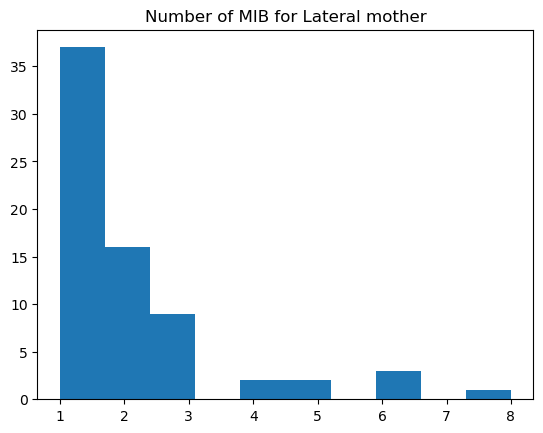

In [9]:
plt.hist(values_count, bins = 10)
plt.title('Number of MIB for Lateral mother') 
plt.show()

## Number of MIB for APICAL mothers

In [10]:
values_count_API = [len(distances_dict_ap[key]) for key in distances_dict_ap.keys() if len(distances_dict_ap[key]) != 0]
print(values_count_API) 
len(values_count_API)

[1, 1, 2, 1, 1, 3, 1, 2, 1, 3, 1, 2, 3, 1, 7, 2, 1, 5, 3, 1, 2, 1, 2, 4, 7, 1, 1, 1, 1, 1, 1, 1, 2, 2, 7, 1, 13, 1, 1, 1, 4, 2, 1, 2, 5, 1, 8, 2, 1, 2, 2, 1, 3, 1, 2, 2, 1, 1, 2, 2, 12, 1, 6, 2, 1, 4, 1, 2, 7, 5, 8, 8, 6, 1, 1, 4, 2, 7, 3, 2, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 10, 3, 2, 1, 6, 6, 5, 3, 3, 2, 5, 1, 4, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 4, 10, 3, 2, 3, 4, 1, 8, 2, 2, 1, 3, 4, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 6, 6, 2, 1, 2, 2, 1, 5, 3, 2, 2, 5, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1]


165

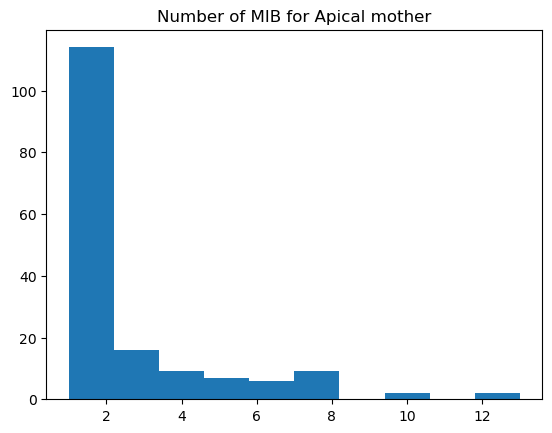

In [11]:
plt.hist(values_count_API, bins = 10)
plt.title('Number of MIB for Apical mother') 
plt.show()


### Let's normalize everything by the length of the branch 

In [12]:
def abscisse_curviligne(b) -> (np.ndarray, float):
    """
    Renvoie la liste des abscisses curvilignes des noeuds de la branche
    et la longueur totale de la branche
    """
    pos = np.array([[b.n2x[n], b.n2y[n]] for n in b.noeuds])
    distances = np.sqrt(np.sum((pos[1:, :] - pos[:-1, :]) ** 2, axis=-1))
    total_length = np.sum(distances)
    abscisse = np.cumsum(distances)
    abscisse = np.insert(abscisse, 0, 0)
    return abscisse, total_length

def lengths(reseau):
     lens=[]
     lengths = {n: [] for n in reseau.branches}
     for b in reseau.branches: 
        value = abscisse_curviligne(b)[1]
        lengths[b].append(value)
     return lengths

lenghts_dic= lengths(reseau)
lens=[]
for l in lengths(reseau).values():
    if l[0] != 0:                           #ZEROS HAVE BEEN MANUALLY REMOVED
        lens.append(l[0])

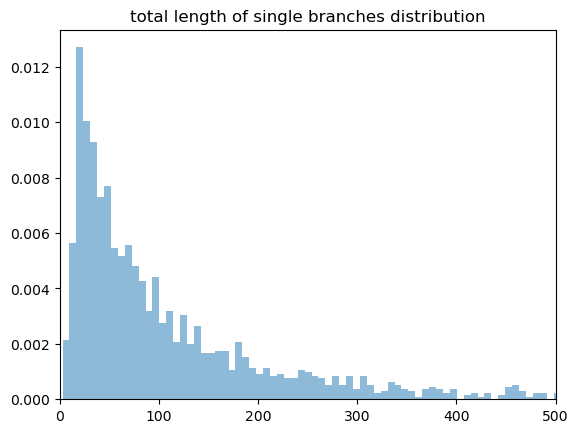

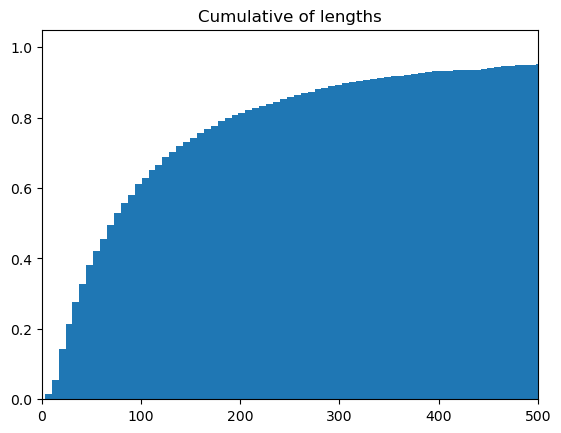

In [13]:
plt.hist(lens, bins=400, alpha=0.5,density=True)
plt.title('total length of single branches distribution')
plt.xlim(0,500)
plt.show()


ordered = lens.sort()
plt.hist(lens,bins=400,cumulative = True,density = True)
plt.title('Cumulative of lengths') 
plt.xlim(0,500)
plt.show()

In [14]:
normalized_api_counts=[]
for key,value in distances_dict_ap.items():

    if value != {}:      
         length_branch= lenghts_dic[key][0]
         count= len(distances_dict_ap[key])
         normalized_api_counts.append(count/length_branch)


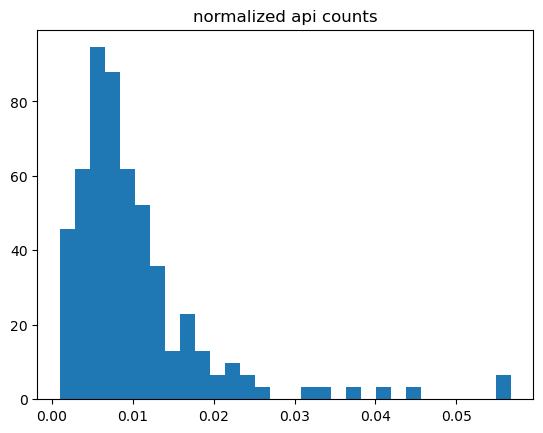

In [15]:
plt.hist(normalized_api_counts, bins= 30, density =True)
plt.title('normalized api counts') 
plt.show()

In [16]:
normalized_lat_counts=[]
for key,value in distances_dict_lat.items():

    if value != {}:      
         length_branch= lenghts_dic[key][0]
         count= len(distances_dict_lat[key])
         normalized_lat_counts.append(count/length_branch)


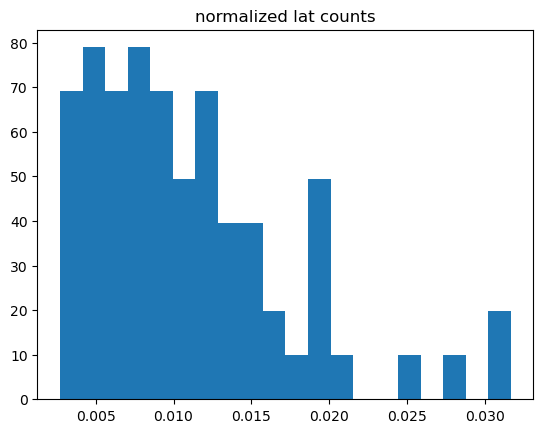

In [17]:
plt.hist(normalized_lat_counts, bins= 20,density =True)
plt.title('normalized lat counts') 
#plt.yscale('log')
plt.show()

In [18]:
a=0
l=0
for b in reseau.branches: 
    if b.nature == 'Apical':
        a+=1
    if b.nature == 'Lateral':
        l +=1

print('TOT API' , a, 'TOT LAT' , l)
print('MIB API', sum(values_count_API) , 'MIB LAT', sum(values_count))
print(len(values_count))

TOT API 957 TOT LAT 926
MIB API 421 MIB LAT 140
70


# RESULTS:
* In the reseau there are **957 APICAL branches**, and a total of **421 cases of MIB** on **165 different branches**. So the $17,24\%$ of Apical Branches presents MIB.
* In the reseau there are **926 Lateral branches**, and a total of **140 cases of MIB** spread on **70 different branches**. So the $7,5\%$ of Lateral Branches presents MIB. 

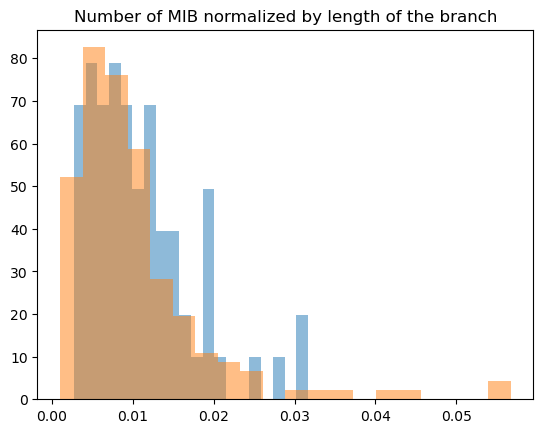

In [19]:
plt.hist(normalized_lat_counts, bins= 20,alpha = 0.5 ,density =True)
plt.hist(normalized_api_counts, bins= 20, alpha= 0.5 ,density =True)
plt.title('Number of MIB normalized by length of the branch') 
plt.show()

#### Let's compare $1^{st} \, \text{and} \, 2^{nd}$ moments of the distributions 

In [20]:

mean_histogram1 = np.mean(normalized_lat_counts)
mean_histogram2 = np.mean(normalized_api_counts)

std_histogram1 = np.std(normalized_lat_counts)
std_histogram2 = np.std(normalized_api_counts)

print(mean_histogram1,
mean_histogram2,
      std_histogram1 ,std_histogram2)

0.011015237246309621 0.01026058601245004 0.006436251989404059 0.008742979865146626


#### Perform Kolmogorov Smirnov test on the distributions

In [21]:
from scipy.stats import kstest

In [22]:
statistic, p_value = kstest(normalized_lat_counts,normalized_api_counts )

In [23]:
print("Kolmogorov-Smirnov test statistic:", statistic)
print("p-value:", p_value)

Kolmogorov-Smirnov test statistic: 0.15930735930735931
p-value: 0.14552715754834894


#### The distributions are likely to be the same distribution. 

# PHASE DIAGRAM LATERAL AND APICAL

#### Let's plot the phase diagram differenciating the two kinds of elements to check if there is any neat separation in the phase diagram or not 

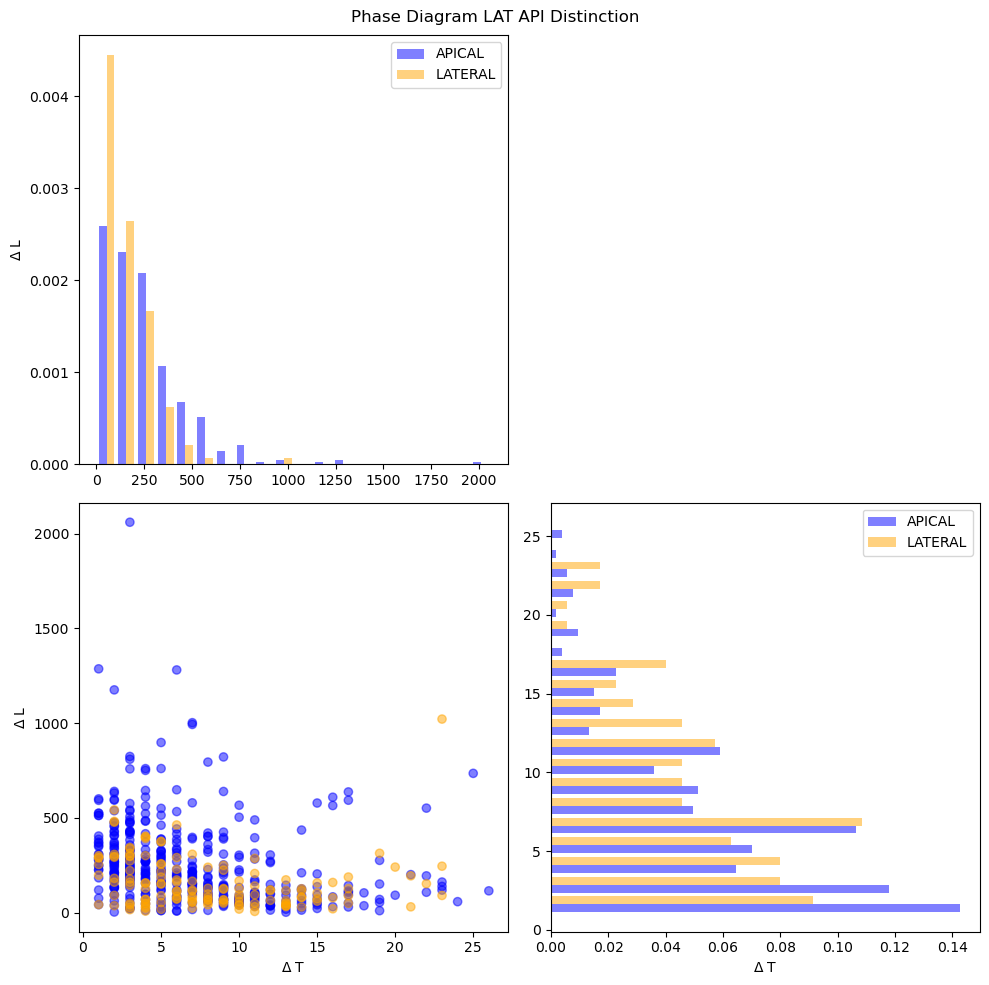

In [25]:

times = np.concatenate([times_ap, times_lat])
distances = np.concatenate([distances_ap, distances_lat])

# Assign colors for points from different datasets
colors = np.array(['blue'] * len(times_ap) + ['orange'] * len(times_lat))

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot histograms
axs[0, 0].hist([distances_ap, distances_lat], bins=20,density =True, alpha=0.5, color=['blue', 'orange'], orientation='vertical', label=['APICAL', 'LATERAL'])
axs[0, 0].set_ylabel('$\Delta$ L')
axs[0, 0].legend()

axs[1, 1].hist([times_ap,times_lat], bins=20, density =True, alpha=0.5, color=['blue', 'orange'], orientation='horizontal', label=['APICAL', 'LATERAL'])
axs[1, 1].set_xlabel('$\Delta$ T')
axs[1, 1].legend()

# Plot scatter plot
axs[1, 0].scatter(times, distances, color=colors, alpha=0.5)
axs[1, 0].set_xlabel('$\Delta$ T')
axs[1, 0].set_ylabel('$\Delta$ L')

# Remove empty subplot
plt.delaxes(axs[0, 1])

# Add title
plt.suptitle('Phase Diagram LAT API Distinction')

# Adjust layout
plt.tight_layout()
# Show plot
plt.show()


### They don't seem to be separated in space. 

# ANALISYS OF FIRST OCCURRENCIES

In [26]:
closest_neighbors_old_lat = {}
for b in distances_dict_lat.keys():
    min_distance = float('inf') 
    closest_neighbor = None
    for neighbor, distance in distances_dict_lat[b].items():
        if distance < min_distance:
            min_distance = distance
            closest_neighbor = neighbor
    closest_neighbors_old_lat[b] = (closest_neighbor, min_distance)

closest_neighbors_new_lat = closest_neighbors_old_lat.copy()
for i in closest_neighbors_old_lat.keys():

    if closest_neighbors_old_lat[i] == (None, float('inf')) : 
        closest_neighbors_new_lat.pop(i)



closest_neighbors_lat = {key: value[1] for key, value in closest_neighbors_new_lat.items()}



In [27]:
closest_neighbors_old_ap = {}
for b in distances_dict_ap.keys():
    min_distance = float('inf') 
    closest_neighbor = None
    for neighbor, distance in distances_dict_ap[b].items():
        if distance < min_distance:
            min_distance = distance
            closest_neighbor = neighbor
    closest_neighbors_old_ap[b] = (closest_neighbor, min_distance)

closest_neighbors_new_ap = closest_neighbors_old_ap.copy()
for i in closest_neighbors_old_ap.keys():

    if closest_neighbors_old_ap[i] == (None, float('inf')) : 
        closest_neighbors_new_ap.pop(i)



closest_neighbors_ap = {key: value[1] for key, value in closest_neighbors_new_ap.items()}



In [28]:
closest_times_lat = {}

for b in time_diffs_dict_lat.keys():
    min_time_diff = float('inf') 
    closest_time = None 
    for neighbor, time_diff in time_diffs_dict_lat[b].items():
        if time_diff < min_time_diff:
            min_time_diff = time_diff
            closest_time = time_diff  # Assigning closest_time to the time difference
    
    if closest_time != None:
        closest_times_lat[b] = closest_time 



In [29]:
closest_times_ap = {}

for b in time_diffs_dict_ap.keys():
    min_time_diff = float('inf') 
    closest_time = None 
    for neighbor, time_diff in time_diffs_dict_ap[b].items():
        if time_diff < min_time_diff:
            min_time_diff = time_diff
            closest_time = time_diff  # Assigning closest_time to the time difference
    
    if closest_time != None:
        closest_times_ap[b] = closest_time 


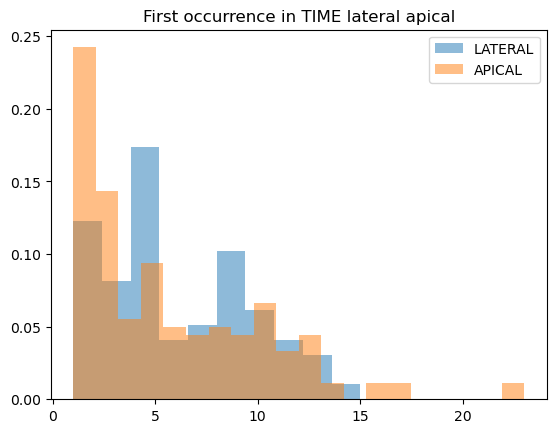

In [30]:
plt.hist(closest_times_lat.values(), bins=10, alpha=0.5, density = True,label= 'LATERAL') 
plt.hist(closest_times_ap.values(), bins=20, alpha=0.5, density = True,label = 'APICAL')
plt.title('First occurrence in TIME lateral apical')
plt.legend()
plt.show()

In [31]:
statistic, p_value = kstest(list(closest_times_lat.values()),list(closest_times_ap.values() ))
print("Kolmogorov-Smirnov test statistic:", statistic)
print("p-value:", p_value)

Kolmogorov-Smirnov test statistic: 0.13852813852813853
p-value: 0.27182721868572085


#### Also in this case the two distributions are likely to be the same

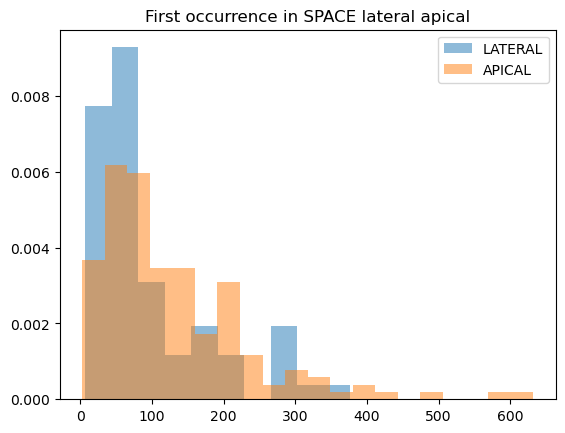

In [32]:
plt.hist(closest_neighbors_lat.values(), bins=10, alpha=0.5, density = True,label= 'LATERAL') 
plt.hist(closest_neighbors_ap.values(), bins=20, alpha=0.5, density = True,label = 'APICAL')
plt.title('First occurrence in SPACE lateral apical')
plt.legend()                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
plt.show()

In [33]:
statistic, p_value = kstest(list(closest_neighbors_lat.values()),list(closest_neighbors_ap.values() ))
print("Kolmogorov-Smirnov test statistic:", statistic)
print("p-value:", p_value)

Kolmogorov-Smirnov test statistic: 0.24891774891774893
p-value: 0.003577705630530837


# In this case the statistics are significantly different ?? 

# NORMALIZED OVER BRANCH LENGTH FIRST OCCURRENCIES IN SPACE

In [50]:
def lengths(reseau):
     lens=[]
     lengths = {n: [] for n in reseau.branches}
     for b in reseau.branches: 
        value = abscisse_curviligne(b)[1]
        lengths[b].append(value)
     return lengths

lenghts= lengths(reseau)
lens=[]
lens_fusion=[]
for key,value in lengths(reseau).items():
    if key.ending == 'Fusion?' and value[0] != 0:
        lens_fusion.append(value[0])
    if value[0] != 0:                           #ZEROS HAVE BEEN MANUALLY REMOVED
        lens.append(value[0])


In [51]:
normalized_lat=[]

for i in closest_neighbors_lat.keys():  
    if closest_neighbors_lat[i] < lenghts[i]:
        normalized_lat.append(closest_neighbors_lat[i] / lenghts[i] ) 
    


In [52]:
normalized_ap=[]

for i in closest_neighbors_ap.keys(): 
    if closest_neighbors_ap[i] <  lenghts[i]:
        normalized_ap.append(closest_neighbors_ap[i] / lenghts[i] ) 




In [53]:
norm_lat=[]
for l in normalized_lat:
    if l!= 0.0:
        norm_lat.append(l[0])

In [54]:
norm_ap=[]
for l in normalized_ap:
    if l!= 0.0:
        norm_ap.append(l[0])

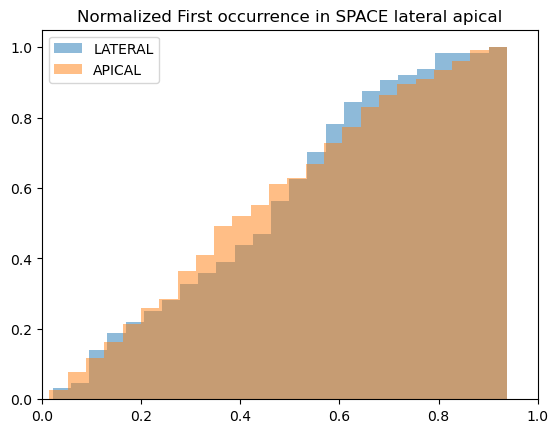

In [58]:
plt.hist(norm_lat, bins=25, alpha=0.5,cumulative=True, density = True,label= 'LATERAL') 
plt.hist(norm_ap, bins=25, alpha=0.5, cumulative =True , density = True,label = 'APICAL')
plt.title('Normalized First occurrence in SPACE lateral apical')
plt.xlim(0,1)
plt.legend()
plt.show()

In [60]:
statistic, p_value = kstest(norm_lat,norm_ap)
print("Kolmogorov-Smirnov test statistic:", statistic)
print("p-value:", p_value)

Kolmogorov-Smirnov test statistic: 0.1185064935064935
p-value: 0.5036141658481552


# SUMMARY OF RESULTS: 

* In the reseau there are **957 APICAL branches**, and a total of **421 cases of MIB** on **165 different branches**. So the $17,24\%$ of Apical Branches presents MIB.
* In the reseau there are **926 Lateral branches**, and a total of **140 cases of MIB** spread on **70 different branches**. So the $7,5\%$ of Lateral Branches presents MIB. 

* The distribution of the number of MIBs seems to be the same in the two cases so in terms of **numbers** of MIBs there is **no significant distinction between apical and lateral number of MIB**.

* The first occurrences of MIB's in space are **equally distributed** in APICAL and LATERAL